In [1]:
#Part 1

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [4]:
ticker='PG'
data = pd.DataFrame()
data[ticker]=wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

In [9]:
log_returns = np.log(1+ data.pct_change()) ##pandas.pct_change() - Obtains simple returns from a provided dataset
log_returns.tail()


,PG
Date,
2020-07-23,0.006449
2020-07-24,-0.001587
2020-07-27,0.002854
2020-07-28,0.012274
2020-07-29,0.008332


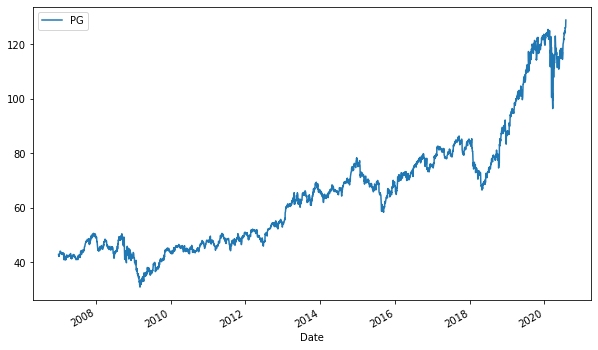

In [6]:
data.plot(figsize=(10,6));

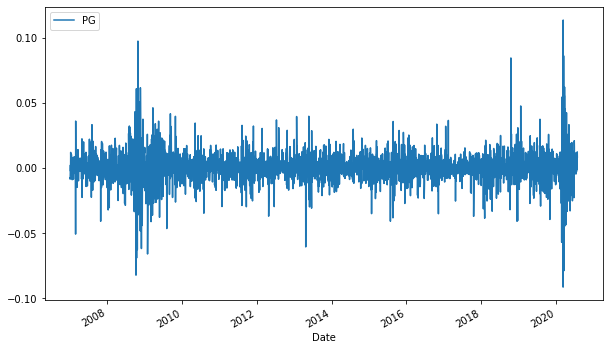

In [7]:
log_returns.plot(figsize= (10,6))

In [8]:
u = log_returns.mean()
u

PG    0.000322
dtype: float64

In [10]:
var = log_returns.var()
var

PG    0.000143
dtype: float64

In [11]:
# drift = u-(0.5).var

In [12]:
drift = u-(0.5*var)
drift

PG    0.000251
dtype: float64

In [13]:
stdev = log_returns.std()
stdev

PG    0.011947
dtype: float64

In [14]:
# Part 2

In [15]:
type(drift)


pandas.core.series.Series

In [16]:
type(stdev)

pandas.core.series.Series

In [17]:
np.array(drift)

array([0.00025097])

In [18]:
drift.values # object.values - transfers the objects into a numpy array


array([0.00025097])

In [19]:
stdev.values

array([0.01194702])

In [20]:
norm.ppf(0.95) # scipy 's ppf function allow us to obtain Z's result. the event have 95% of occuring

1.6448536269514722

In [27]:
x= np.random.rand(10,2) 
x

# To complete the 2nd component we will need to randomise, random rand function can help us do that easily.
# If we want to create a mutidimentonal arrary will need to insert 2 arguments. this case 10 & 2

array([[0.93771169, 0.01944891],
       [0.15083904, 0.27291724],
       [0.52349911, 0.95238133],
       [0.81109489, 0.18423256],
       [0.40709391, 0.08787633],
       [0.62926736, 0.85142262],
       [0.497555  , 0.22896082],
       [0.98099632, 0.57610316],
       [0.18009668, 0.32999925],
       [0.57884977, 0.88746615]])

In [29]:
norm.ppf(x)

# We will include this random element in the ppf distribution to obtain the distance from the mean corresponding with each of these randomly generated properbilities.
# 1st number from 1 row correspond with the 1st row of the x matrix, 2nd element to the 2nd proberbility and so on.


array([[ 1.5358441 , -2.06526627],
       [-1.03284151, -0.60401379],
       [ 0.05893764,  1.66839504],
       [ 0.88193822, -0.89935213],
       [-0.23502694, -1.35394895],
       [ 0.32991356,  1.04255433],
       [-0.00612874, -0.74227349],
       [ 2.07477528,  0.19193429],
       [-0.91499672, -0.43991524],
       [ 0.19895179,  1.21316249]])

In [31]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.64230896, -0.16830533],
       [ 1.23138636,  0.83007568],
       [-1.35067016, -0.0962899 ],
       [-0.04747074,  1.10805195],
       [-0.8078225 , -0.56215354],
       [-1.17203491,  0.08823301],
       [-0.98697691, -1.08979506],
       [-0.36397272,  2.4855874 ],
       [ 0.96966479,  1.06674592],
       [-1.47647236,  2.28149183]])

In [32]:
# The newly created array use probabiliity generated by the rand funciton can convert with them into distance with . the mean 0, as measures by thenumber of std. Expression create number of Z as define in formula

In [33]:
t_intervals = 1000 # for the next 1000 days
interations = 10 # 10 series of future price predictions

In [34]:
# Formula
# Daily_returns = e^x
# r = drift + stdev*z


In [35]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, interations)))
daily_returns

array([[0.99697516, 0.9984796 , 0.9959027 , ..., 1.00058366, 1.02974491,
        0.98439046],
       [0.99754546, 1.00262596, 1.00901767, ..., 0.97470463, 0.98808232,
        0.99682577],
       [1.00107469, 0.99981034, 1.00398938, ..., 1.00292238, 0.9798529 ,
        0.9868306 ],
       ...,
       [0.98744697, 0.98600601, 1.0007491 , ..., 0.99208525, 1.02394852,
        0.99412395],
       [0.98829939, 1.00345311, 1.0191631 , ..., 0.99645704, 1.02044661,
        1.00747278],
       [1.00453777, 0.99476408, 0.99104574, ..., 1.00974887, 0.98103295,
        1.00851758]])

In [36]:
#numpy.exp() - calculate e^(expression)


#in the [] we will have the value of the drift and the product of the std in the random component created with the help of the norm moduel, its % value #is generated by numpy's rand funciton using time intervals and iterations. Specifying the dimentions of the array fill with values from 0 to 1

In [37]:
#Generated 10 sets of 1000 value array. #10 columns * 1000 rows

In [38]:
# Part 3

In [39]:
S0 = data.iloc[-1]
S0

# 1st stock price on list is the last one display as it is the latest data price/
#data.iloc[-1], wanating to obtain the last value from the table.

PG    128.949997
Name: 2020-07-29 00:00:00, dtype: float64

In [40]:
# Now filling the list, how big the list should be? AS big as the daily return array, the price array as be at mos tas big as the daily matrix and numpy # has method to create a array with the same dimention as the array that exists and we have specificed.

price_list = np.zeros_like(daily_returns)
price_list

# numpy.zeros_like() fill as value into zero. As argument enter the daily_returns array. We will obatin an array of 1000*10 element just like the diamentions of daily returns and filled it with zeros.

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
# Why create such object? now we can replace zero with such stock prices, by using a loop.

price_list[0]=S0 # not just the 1st value but the entire row of the 10 elements. [0] as the 1st row.
price_list

array([[128.94999695, 128.94999695, 128.94999695, ..., 128.94999695,
        128.94999695, 128.94999695],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [42]:
#now can generate a list of price list starting at day 1 and ends at day 1000.
# St = St-1 * daily_returns:

for t in range (1, t_intervals):
	price_list[t]= price_list[t-1]*daily_returns[t]

In [43]:
price_list

array([[128.94999695, 128.94999695, 128.94999695, ..., 128.94999695,
        128.94999695, 128.94999695],
       [128.6334834 , 129.28861387, 130.11282486, ..., 125.68815861,
        127.41321253, 128.54067956],
       [128.77172488, 129.26409305, 130.63189408, ..., 126.05546704,
        124.84620524, 126.84787651],
       ...,
       [ 97.91162903, 103.72782199, 188.75707022, ..., 213.86804542,
        246.87816906, 163.20903694],
       [ 96.76600286, 104.08600512, 192.37424124, ..., 213.1103188 ,
        251.92599037, 164.42866227],
       [ 97.20510506, 103.54101872, 190.65167221, ..., 215.18790417,
        247.14769732, 165.82919668]])

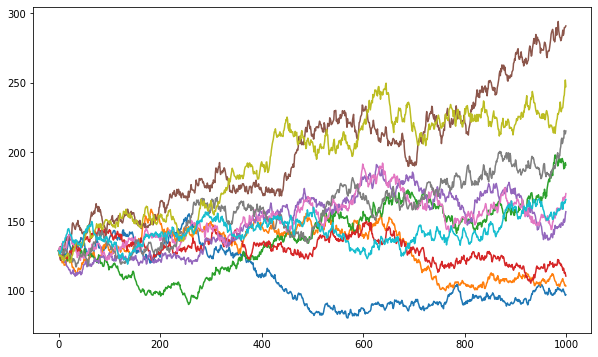

In [46]:
plt.figure(figsize=(10,6))
plt.plot(price_list);